In [ ]:
!pip install pycaret[full]
import pycaret
pycaret.__version__

from pycaret.classification import *
import pandas as pd

!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification

!unzip machine-predictive-maintenance-classification.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
data = pd.read_csv('predictive_maintenance.csv')

s = setup(data, target = 'Type', session_id = 123, use_gpu = True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,123
1,Target,Type
2,Target type,Multiclass
3,Target mapping,"H: 0, L: 1, M: 2"
4,Original data shape,"(10000, 10)"
5,Transformed data shape,"(10000, 15)"
6,Transformed train set shape,"(7000, 15)"
7,Transformed test set shape,"(3000, 15)"
8,Numeric features,7
9,Categorical features,2


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

In [ ]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.6000,0.5000,0.6000,0.3600,0.4500,0.0000,0.0000,0.1670
rf,Random Forest Classifier,0.6000,0.5052,0.6000,0.3600,0.4500,0.0000,0.0000,1.1450
ada,Ada Boost Classifier,0.6000,0.0000,0.6000,0.3600,0.4500,0.0000,0.0000,0.6100
gbc,Gradient Boosting Classifier,0.6000,0.0000,0.6000,0.3600,0.4500,0.0000,0.0000,2.7070
lda,Linear Discriminant Analysis,0.6000,0.0000,0.6000,0.3600,0.4500,0.0000,0.0000,0.1890
et,Extra Trees Classifier,0.6000,0.5008,0.6000,0.3600,0.4500,0.0000,0.0000,0.4710
xgboost,Extreme Gradient Boosting,0.6000,0.4942,0.6000,0.3600,0.4500,0.0000,0.0000,0.7660
lightgbm,Light Gradient Boosting Machine,0.6000,0.5061,0.6000,0.3600,0.4500,0.0000,0.0000,0.4040
dummy,Dummy Classifier,0.6000,0.5000,0.6000,0.3600,0.4500,0.0000,0.0000,0.2200
ridge,Ridge Classifier,0.5997,0.0000,0.5997,0.3599,0.4499,-0.0005,-0.0051,0.1880


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

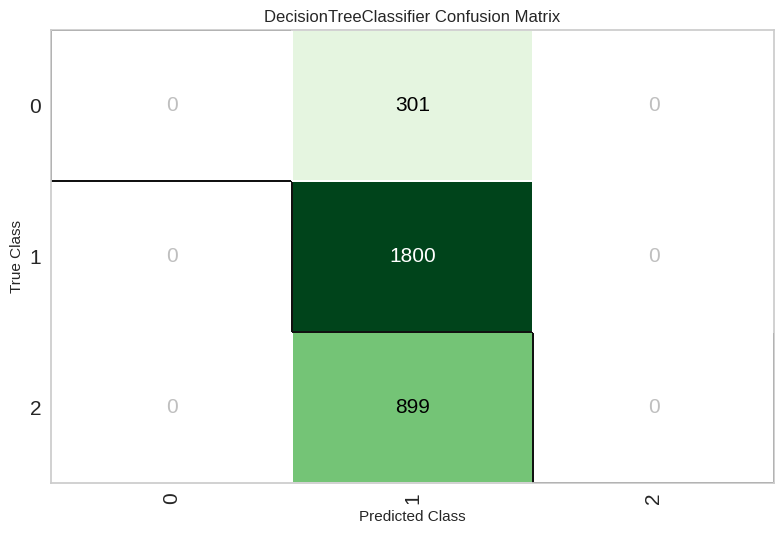

In [ ]:
plot_model(best, plot = 'confusion_matrix')
plot_model(best, plot = 'auc')
plot_model(best, plot = 'feature')

help(plot_model)
evaluate_model(best)

In [ ]:
holdout_pred = predict_model(best)
holdout_pred.head()

new_data = data.copy()
new_data.drop('Type', axis=1, inplace=True)
new_data.head()

predictions = predict_model(best, data = new_data)
predictions.head()

save_model(best, 'my_maintenance_model')
loaded_best_pipeline = load_model('my_maintenance_model')
loaded_best_pipeline

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.6000,0,0.6000,0.3600,0.4500,0.0000,0.0000


Transformation Pipeline and Model Successfully Saved
Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['UDI', 'Air temperature [K]',
                                             'Process temperature [K]',
                                             'Rotational speed [rpm]',
                                             'Torque [Nm]', 'Tool wear [min]',
                                             'Target'],
                                    transformer=Simpl...
                                    transformer=CleanColumnNames(match='[\\]\\[\\,\\{\\}\\"\\:]+'))),
                ('trained_model',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        monotonic_cst=None, random_state=123,
                                        splitter='best'))],
         verbose=False)